### Bank Loan Defaulter Classification

1. Data Visualization
2. Data Cleaning
    1. Missing Values
    2. Imputation
3. Feature Engineering
4. Model building and accuracy 


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df = pd.read_csv("lending_club_loan_two.csv")

In [4]:
df.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [5]:
df.size

10692810

In [6]:
df.shape

(396030, 27)

**We'll now read the file "lending_club_info.csv" which has all the metadata related our dataframe, meaning what each and every column actually implies**

In [7]:
metadata = pd.read_csv("lending_club_info.csv")

In [8]:
metadata

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [9]:
metadata["Description"][25]

'Indicates whether the loan is an individual application or a joint application with two co-borrowers'

In [10]:
metadata["Description"][22]

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

We can notice that most of the data is categorical in nature, and so is our target variable. Let's try to visualize our data a little more

<AxesSubplot:xlabel='loan_status', ylabel='count'>

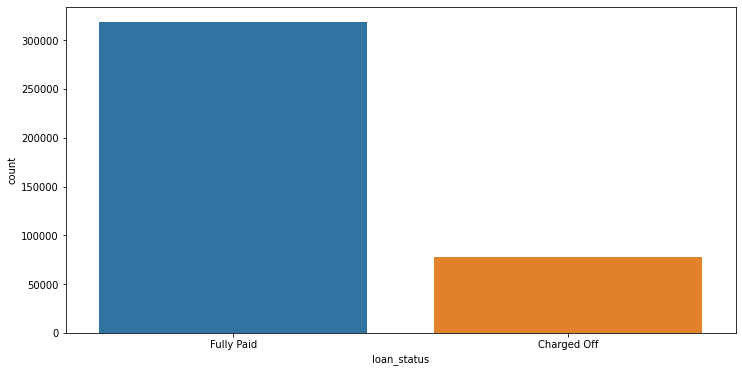

In [11]:
plt.figure(figsize = [12,6])
sns.countplot(x="loan_status", data=df )

In [12]:
df["loan_status"].value_counts()*100 / len(df)

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

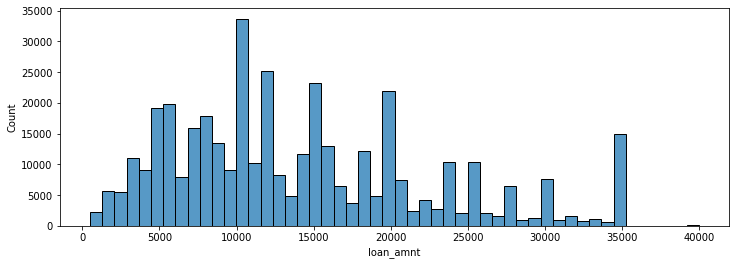

In [13]:
plt.figure(figsize = [12,4])
sns.histplot(df["loan_amnt"], bins = 50)

<AxesSubplot:>

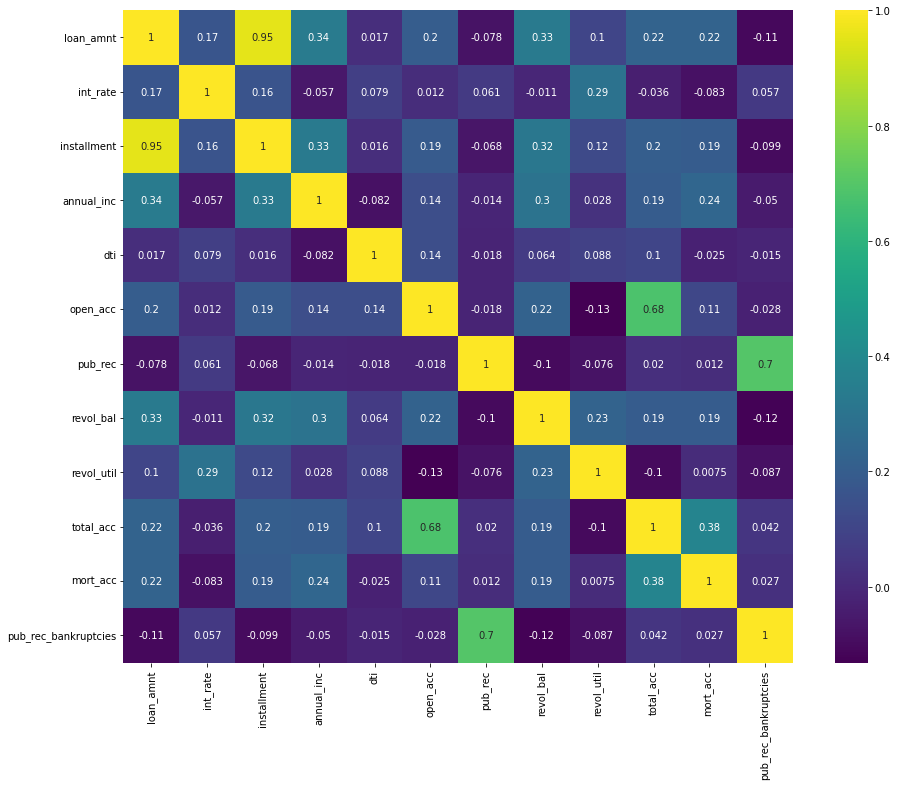

In [14]:
plt.figure(figsize = [15,12])
sns.heatmap(df.corr(), annot = True, cmap = "viridis")

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

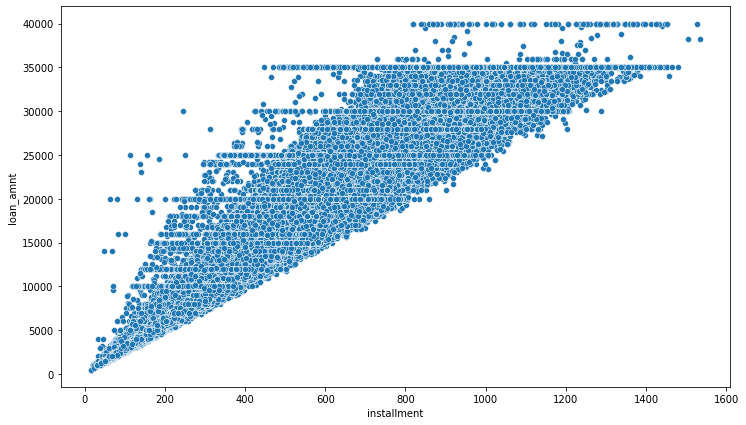

In [15]:
plt.figure(figsize = [12,7])
sns.scatterplot(x = "installment", y = "loan_amnt", data = df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

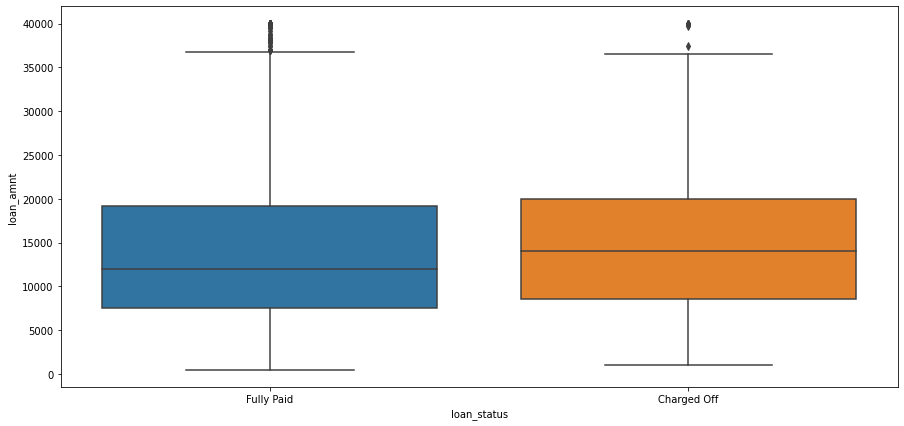

In [16]:
plt.figure(figsize = [15,7])
sns.boxplot(x = "loan_status", y = "loan_amnt", data=df)

The median loan amount is almost the same, so loan amount is not a good factor in deciding whether a person will default or not



In [17]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
df["grade"]

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [19]:
metadata["Description"][4]

'LC assigned loan grade'

In [20]:
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

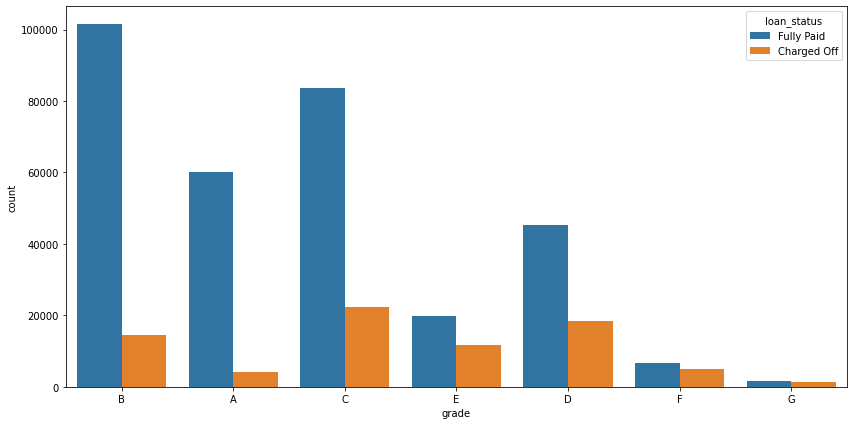

In [21]:
plt.figure(figsize = [14,7])
sns.countplot(x="grade", hue="loan_status",data=df)

In [22]:
df[df["grade"] == "A"].groupby("loan_status")["grade"].count()*100 / len(df[df["grade"] == "A"])

loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64

In [23]:
df[df["grade"] == "B"].groupby("loan_status")["grade"].count()*100 / len(df[df["grade"] == "B"])

loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64

In [24]:
df[df["grade"] == "G"].groupby("loan_status")["grade"].count()*100 / len(df[df["grade"] == "G"])

loan_status
Charged Off    47.8389
Fully Paid     52.1611
Name: grade, dtype: float64

In [25]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

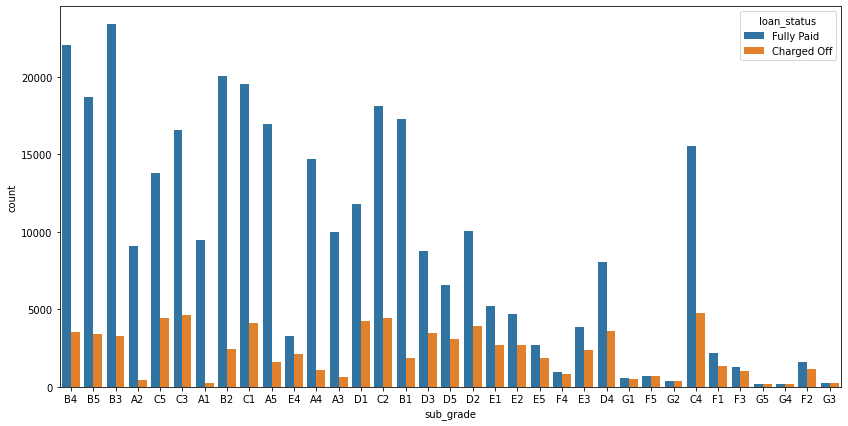

In [26]:
plt.figure(figsize = [14,7])
sns.countplot(x="sub_grade", hue="loan_status", data=df)

In [27]:
sub_order = sorted(df["sub_grade"].unique())

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

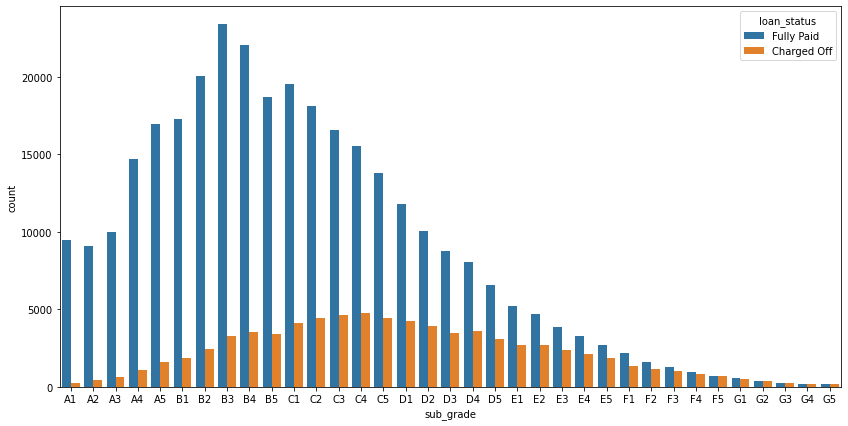

In [28]:
plt.figure(figsize = [14,7])
sns.countplot(x="sub_grade", hue="loan_status",order = sub_order, data=df)

In [29]:
df[df["sub_grade"] == "A1"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "A1"])

loan_status
Charged Off     2.867715
Fully Paid     97.132285
Name: sub_grade, dtype: float64

In [30]:
df[df["sub_grade"] == "A2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "A2"])

loan_status
Charged Off     4.818647
Fully Paid     95.181353
Name: sub_grade, dtype: float64

In [31]:
df[df["sub_grade"] == "A3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "A3"])

loan_status
Charged Off     5.805598
Fully Paid     94.194402
Name: sub_grade, dtype: float64

In [32]:
df[df["sub_grade"] == "A4"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "A4"])

loan_status
Charged Off     7.023877
Fully Paid     92.976123
Name: sub_grade, dtype: float64

In [33]:
df[df["sub_grade"] == "B1"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "B1"])

loan_status
Charged Off     9.8582
Fully Paid     90.1418
Name: sub_grade, dtype: float64

In [34]:
df[df["sub_grade"] == "B2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "B2"])

loan_status
Charged Off    10.8513
Fully Paid     89.1487
Name: sub_grade, dtype: float64

In [35]:
df[df["sub_grade"] == "B3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "B3"])

loan_status
Charged Off    12.335397
Fully Paid     87.664603
Name: sub_grade, dtype: float64

In [36]:
df[df["sub_grade"] == "B4"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "B4"])

loan_status
Charged Off    13.839303
Fully Paid     86.160697
Name: sub_grade, dtype: float64

In [37]:
df[df["sub_grade"] == "C1"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "C1"])

loan_status
Charged Off    17.369622
Fully Paid     82.630378
Name: sub_grade, dtype: float64

In [38]:
df[df["sub_grade"] == "C2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "C2"])

loan_status
Charged Off    19.751993
Fully Paid     80.248007
Name: sub_grade, dtype: float64

In [39]:
df[df["sub_grade"] == "C3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "C3"])

loan_status
Charged Off    21.841572
Fully Paid     78.158428
Name: sub_grade, dtype: float64

In [40]:
df[df["sub_grade"] == "C4"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "C4"])

loan_status
Charged Off    23.535503
Fully Paid     76.464497
Name: sub_grade, dtype: float64

In [41]:
df[df["sub_grade"] == "D1"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "D1"])

loan_status
Charged Off    26.380291
Fully Paid     73.619709
Name: sub_grade, dtype: float64

In [42]:
df[df["sub_grade"] == "D2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "D2"])

loan_status
Charged Off    28.033833
Fully Paid     71.966167
Name: sub_grade, dtype: float64

In [43]:
df[df["sub_grade"] == "D3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "D3"])

loan_status
Charged Off    28.421828
Fully Paid     71.578172
Name: sub_grade, dtype: float64

In [44]:
df[df["sub_grade"] == "D4"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "D4"])

loan_status
Charged Off    31.131509
Fully Paid     68.868491
Name: sub_grade, dtype: float64

In [45]:
df[df["sub_grade"] == "E1"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "E1"])

loan_status
Charged Off    34.406972
Fully Paid     65.593028
Name: sub_grade, dtype: float64

In [46]:
df[df["sub_grade"] == "E2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "E2"])

loan_status
Charged Off    36.73799
Fully Paid     63.26201
Name: sub_grade, dtype: float64

In [47]:
df[df["sub_grade"] == "E3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "E3"])

loan_status
Charged Off    38.037699
Fully Paid     61.962301
Name: sub_grade, dtype: float64

In [48]:
df[df["sub_grade"] == "E4"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "E4"])

loan_status
Charged Off    39.302369
Fully Paid     60.697631
Name: sub_grade, dtype: float64

In [49]:
df[df["sub_grade"] == "F1"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "F1"])

loan_status
Charged Off    38.744344
Fully Paid     61.255656
Name: sub_grade, dtype: float64

In [50]:
df[df["sub_grade"] == "F2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "F2"])

loan_status
Charged Off    42.480116
Fully Paid     57.519884
Name: sub_grade, dtype: float64

In [51]:
df[df["sub_grade"] == "F3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "F3"])

loan_status
Charged Off    43.613298
Fully Paid     56.386702
Name: sub_grade, dtype: float64

In [52]:
df[df["sub_grade"] == "F3"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "F3"])

loan_status
Charged Off    43.613298
Fully Paid     56.386702
Name: sub_grade, dtype: float64

In [53]:
df[df["sub_grade"] == "F4"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "F4"])

loan_status
Charged Off    45.607163
Fully Paid     54.392837
Name: sub_grade, dtype: float64

In [54]:
df[df["sub_grade"] == "G2"].groupby("loan_status")["sub_grade"].count()*100 / len(df[df["sub_grade"] == "G2"])

loan_status
Charged Off    48.275862
Fully Paid     51.724138
Name: sub_grade, dtype: float64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

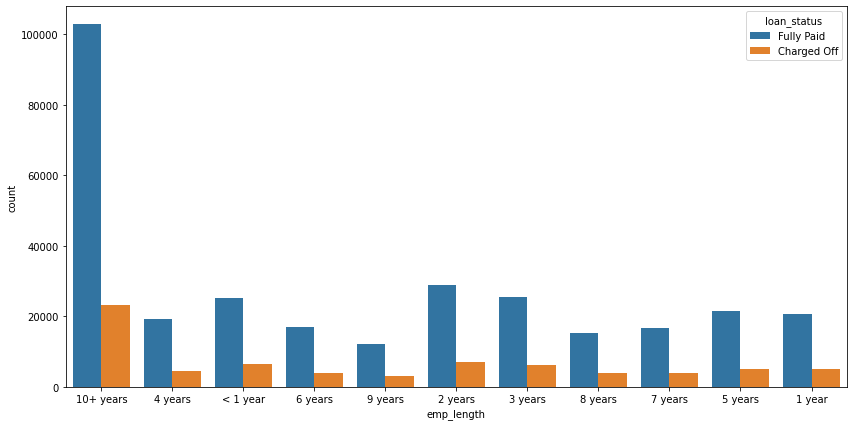

In [55]:
plt.figure(figsize = [14,7])
sns.countplot(x="emp_length", hue="loan_status", data=df)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

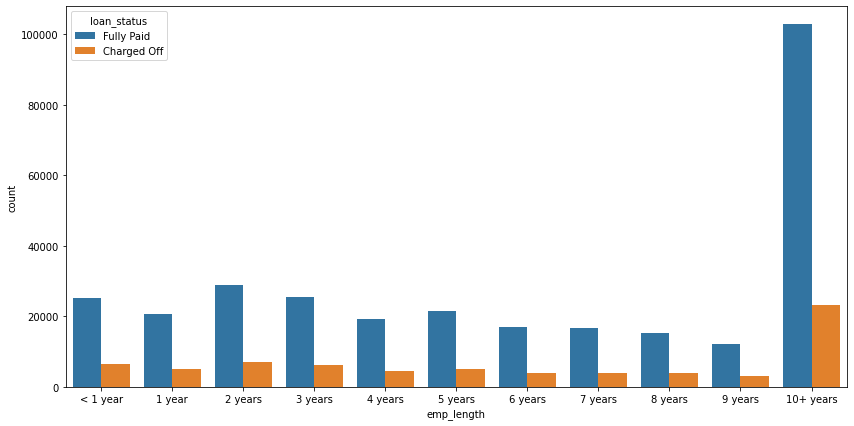

In [56]:
#creating an ordered list of employes
emp_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]
#creating employ length count plot setting hue as loan status
plt.figure(figsize = [14,7])
sns.countplot(x="emp_length",data=df,order=emp_order,hue="loan_status")

<AxesSubplot:xlabel='verification_status', ylabel='count'>

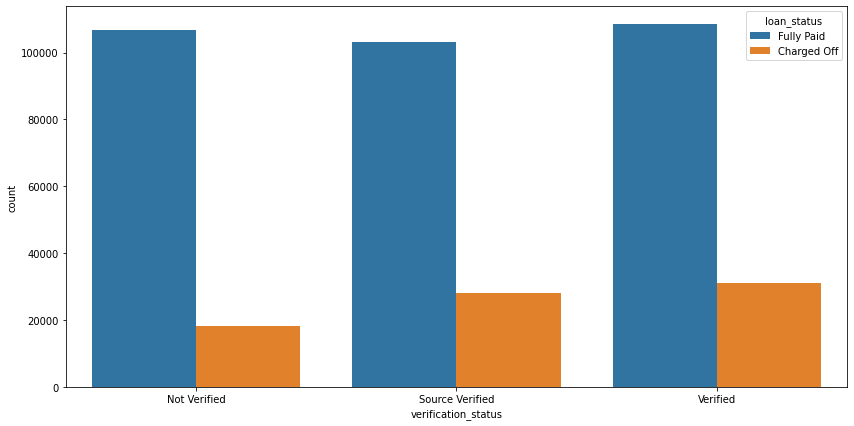

In [57]:
plt.figure(figsize = [14,7])
sns.countplot(x="verification_status", hue="loan_status", data=df)

In [58]:
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x=="Fully Paid" else 0)

In [59]:
df["loan_status"].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [60]:
df.corr()["loan_status"].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_status             1.000000
Name: loan_status, dtype: float64

### NULL VALUES

In [61]:
df.isnull().sum()*100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [62]:
df["emp_title"].nunique()

173105

In [63]:
df.shape

(396030, 27)

We can see that the data shape is of about 4 lakh rows, but only around 2 lakh values are non null for "emp_title". Hence we'll drop this column

In [64]:
df.drop("emp_title", axis = 1, inplace=True)

In [65]:
df.isnull().sum()*100 / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [66]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [67]:
df.drop("emp_length",axis=1,inplace=True)

In [68]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [69]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [70]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [71]:
#since there's duplicacy of information
df.drop("title",inplace=True,axis=1)

In [72]:
#mortage accounts count
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [73]:
#filling the mortage value
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [74]:
df["mort_acc"]=df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [75]:
#dropping remaining data
df.dropna(inplace=True)

In [76]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

## Categorical Variables and Dummy Variables

In [77]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [78]:
#months from string to numeric
df["term"]=df["term"].apply(lambda x:int(x[:3]))

In [79]:
#checking the home ownership
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [80]:
#replacing none and any with other
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [81]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [82]:
df["address"]

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [83]:
#grabbing only last zip code of the address
df["Zip"]=df["address"].apply(lambda x:x[-5:])

In [84]:
df.drop("address",axis = 1, inplace=True)

In [85]:
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [86]:
df["earliest_cr_line"]

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [87]:
df["pub_rec"].value_counts()

0.0     337489
1.0      49713
2.0       5474
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [88]:
metadata["Description"][20]

'Number of derogatory public records'

In [89]:
cols = df.select_dtypes(["object"]).columns

In [90]:
df["pub_rec"].apply(lambda x: 0 if x==0 else 1).value_counts()

0    337489
1     57730
Name: pub_rec, dtype: int64

In [91]:
df["pub_rec"] = df["pub_rec"].apply(lambda x: 0 if x==0 else 1)

In [92]:
def mapping(data , var):
    mapping = {k:i for i,k in enumerate(data[var].unique(), 0)}
    data[var] = data[var].map(mapping)

In [93]:
for var in cols:
    mapping(df,var)

In [94]:
df[cols]

,grade,sub_grade,home_ownership,verification_status,issue_d,purpose,initial_list_status,application_type,Zip
0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,1,0,1
2,0,2,0,1,0,2,1,0,1
3,1,3,0,0,1,2,1,0,2
4,2,4,1,2,2,2,1,0,3
...,...,...,...,...,...,...,...,...,...
396025,0,0,0,1,14,1,0,0,4
396026,2,8,1,1,23,1,1,0,1
396027,0,15,0,2,21,1,1,0,5
396028,2,14,1,2,55,1,1,0,6


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
#dividing data into feature and target
X=df.drop("loan_status",axis=1).values
y=df["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
from tensorflow.keras.callbacks import EarlyStopping

In [109]:
model = Sequential()
model.add(Dense(78, activation = "relu")) # 78 = number of neurons in 1st layer, 
model.add(Dropout(0.2))

model.add(Dense(39, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = "accuracy")
earlystop = EarlyStopping(monitor="val_loss", mode="min",verbose = 1, patience = 5)

In [110]:
model.fit(x = X_train, y=y_train, epochs = 24, batch_size = 256, validation_data=(X_test,y_test), callbacks=[earlystop])

Epoch 1/24
1236/1236 [==============================] - 3s 2ms/step - loss: 0.4288 - accuracy: 0.8298 - val_loss: 0.3749 - val_accuracy: 0.8578
Epoch 2/24
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3794 - accuracy: 0.8551 - val_loss: 0.3598 - val_accuracy: 0.8588
Epoch 3/24
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3619 - accuracy: 0.8584 - val_loss: 0.3308 - val_accuracy: 0.8601
Epoch 4/24
1236/1236 [==============================] - 2s 2ms/step - loss: 0.3203 - accuracy: 0.8726 - val_loss: 0.2764 - val_accuracy: 0.8868
Epoch 5/24
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2878 - accuracy: 0.8841 - val_loss: 0.2669 - val_accuracy: 0.8869
Epoch 6/24
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2783 - accuracy: 0.8854 - val_loss: 0.2655 - val_accuracy: 0.8869
Epoch 7/24
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2738 - accuracy: 0.8859 - val_loss: 0.2639 - val_accuracy:

In [111]:
model.evaluate(X_test, y_test)

2471/2471 [==============================] - 1s 389us/step - loss: 0.2636 - accuracy: 0.8869


[0.26359012722969055, 0.8869237303733826]

<AxesSubplot:>

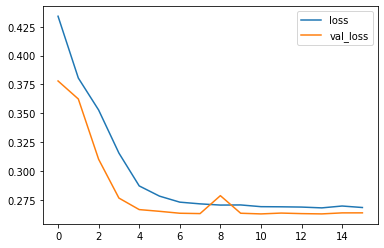

In [102]:
#plotting the loss
loss = pd.DataFrame(model.history.history)
loss.plot()

### Training and validation loss keep decreasing as we keep training the model

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
predict = model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [104]:
#let's look at how other models perform
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [105]:
myModels=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10)]

In [106]:
def myClassification(x):
    clf = x
    clf.fit(X_train,y_train)
    predict = clf.predict(X_test)
    print(classification_report(y_test, predict))

In [107]:
for z in myModels:
    myClassification(z)

              precision    recall  f1-score   support

           0       0.73      0.10      0.18     15658
           1       0.82      0.99      0.90     63386

    accuracy                           0.81     79044
   macro avg       0.77      0.55      0.54     79044
weighted avg       0.80      0.81      0.75     79044

              precision    recall  f1-score   support

           0       0.66      0.18      0.28     15658
           1       0.83      0.98      0.90     63386

    accuracy                           0.82     79044
   macro avg       0.75      0.58      0.59     79044
weighted avg       0.80      0.82      0.77     79044

              precision    recall  f1-score   support

           0       0.48      0.27      0.34     15658
           1       0.84      0.93      0.88     63386

    accuracy                           0.80     79044
   macro avg       0.66      0.60      0.61     79044
weighted avg       0.77      0.80      0.77     79044

              preci